# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_data_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
merged_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
num_mice = merged_data_df['Mouse ID'].nunique() #nunique counts unique values on this column
print("Number of mice:", num_mice)


Number of mice: 249


In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = merged_data_df.duplicated(['Mouse ID', 'Timepoint']) #duplicate values on both columns will be stored in this variable
duplicate_mice_df = merged_data_df[duplicate_mice] # now we store those values in a dataframe
duplicate_mice_df.head() #show first 5 rows of the df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_ID = merged_data_df.duplicated(['Mouse ID'])
duplicate_mice_ID_df = merged_data_df[duplicate_mice_ID]
duplicate_mice_ID_df #same process as before but only taking into account a single column for the analysis instead of two

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
dropping_mouseid_duplicates = merged_data_df.drop_duplicates(['Mouse ID'])
dropping_mouseid_duplicates


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [6]:
# Checking the number of mice in the clean DataFrame.
num_mice_2 = dropping_mouseid_duplicates['Mouse ID'].nunique() #nunique counts unique values on this column
print("Number of mice:", num_mice_2)
# suggested answer was 248, however there are in fact 249 unique mouse ID's 

Number of mice: 249


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summary_statistics = merged_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)']
mean = summary_statistics.mean()
median = summary_statistics.median()
variance = summary_statistics.var()
std_deviation = summary_statistics.std()
sem = summary_statistics.sem()

summary_statistics_df = pd.DataFrame({
    'Mean Tumor Volume': mean,
    'Median Tumor Volume': median,
    'Tumor Volume Variance': variance,
    'Tumor Volume Std. Dev': std_deviation,
    'Tumor Volume Std. Err': sem
})

summary_statistics_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Std. Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_statistics_agg = merged_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean','median','var','std','sem']) # agg() function in pandas allows you to apply multiple aggregation functions to the grouped data simultaneously.
summary_statistics_agg
#if we wanted it on a dataframe:
#summary_statistics_agg_df = pd.DataFrame(summary_statistics_agg)
#summary_statistics_agg_df.head()

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

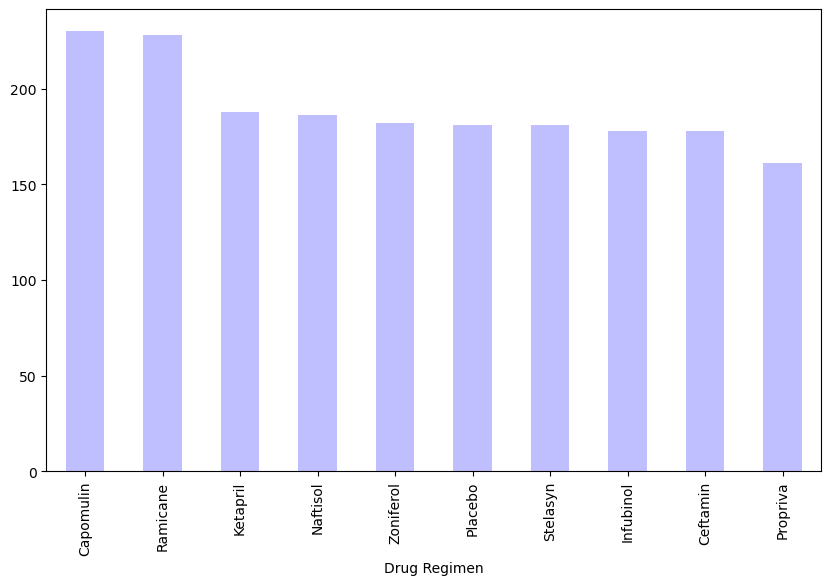

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

rows_per_regimen = merged_data_df['Drug Regimen'].value_counts() #this counts the number of rows for each drug regimen
rows_per_regimen.plot(kind='bar',figsize=(10,6),color='blue',alpha=.25) #this plots the bar graph
plt.show()


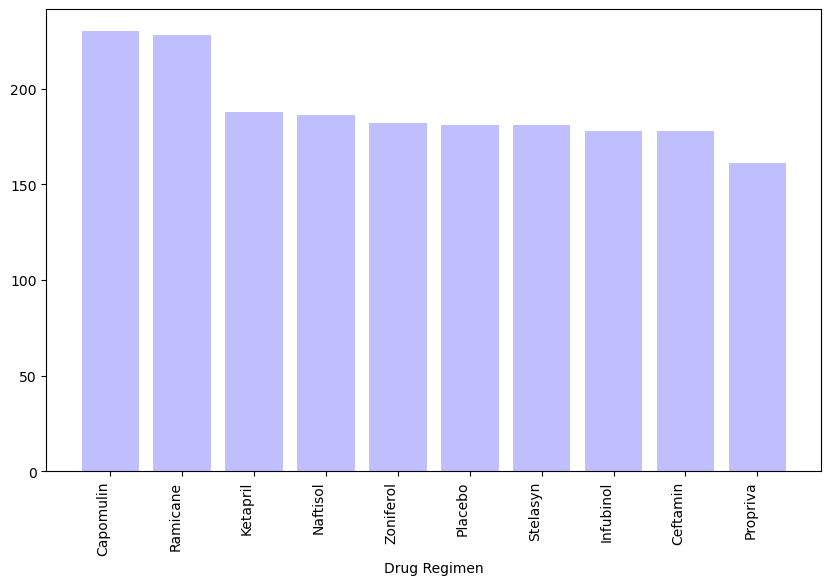

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
rows_per_regimen = merged_data_df['Drug Regimen'].value_counts() #this counts the number of rows for each drug regimen
#these following 2 lines get the drug regimens and corresponding counts
drug_regimens = rows_per_regimen.index #this gets the names
counts = rows_per_regimen.values #this counts each one of them
#plotting:
plt.figure(figsize=(10,6))
plt.bar(drug_regimens, counts, color='blue', alpha=.25)
plt.xlabel('Drug Regimen')
plt.xticks(rotation=90, ha='right')
plt.show()

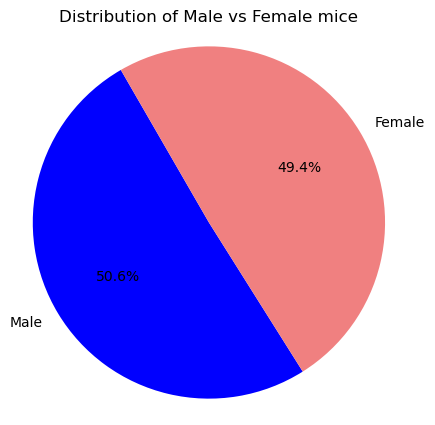

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_distribution = merged_data_df['Sex'].value_counts() #counts the number of male and female mice

gender_distribution.plot(kind='pie', figsize=(5,5), autopct='%1.1f%%', startangle=120, colors=['blue','lightcoral']) #plots the pie graph

plt.title('Distribution of Male vs Female mice')
plt.axis('equal') #Ensures equal aspect ratio
plt.ylabel("") #removes the "count" that appeared on the left
plt.show()

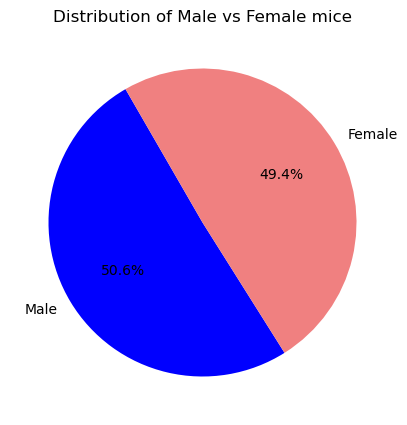

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_distribution = merged_data_df['Sex'].value_counts() #counts the number of male and female mice
labels = gender_distribution.index #gets the "female" and "male" names
sizes = gender_distribution.values #gets the count for each of them
colors = ['blue','lightcoral']

#plotting:
plt.figure(figsize=(5,5))
plt.pie(sizes,labels=labels, colors=colors, autopct='%1.1f%%',startangle=120) #pie chart parameters
plt.title('Distribution of Male vs Female mice')

plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
selected_regimes = ['Capomulin','Ramicane','Infubinol','Ceftamin'] #list of treatment regimes we want to analyze
selected_data = merged_data_df[merged_data_df['Drug Regimen'].isin(selected_regimes)] # .isin is used to check whether each element in a Series or DataFrame is contained in a sequence of values. In this case, the selected regimes. within 'Drug Regimen' column.

# Start by getting the last (greatest) timepoint for each mouse
final_tumor_volume = selected_data.groupby('Mouse ID')['Tumor Volume (mm3)'].max() #groups filtered data by 'Mouse ID' and finds the maximum tumor volume for each mouse

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume_df = pd.merge(final_tumor_volume, merged_data_df, on=['Mouse ID', 'Tumor Volume (mm3)'])
final_tumor_volume_df[['Mouse ID', 'Drug Regimen', 'Tumor Volume (mm3)']]

,Mouse ID,Drug Regimen,Tumor Volume (mm3)
0,a203,Infubinol,67.973419
1,a251,Infubinol,65.525743
2,a275,Ceftamin,62.999356
3,a411,Ramicane,45.466677
4,a444,Ramicane,45.000000
...,...,...,...
95,y769,Ceftamin,68.594745
96,y793,Capomulin,45.000000
97,y865,Ceftamin,64.729837
98,z578,Ramicane,45.000000


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []
tumor_volume_subset = {}

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments_list:
    treatment_data = merged_data_df[merged_data_df['Drug Regimen'] == treatment] # Filter data for the current treatment regimen
    tumor_vol = treatment_data['Tumor Volume (mm3)']# Get tumor volume data for the current treatment regimen
    tumor_volume_data.append(tumor_vol)# Append tumor volume data to the list previously created as empty
    
    # Calculate the quartiles and IQR
    quartiles = tumor_vol.quantile([0.25, 0.5, 0.75]) #calculates the quartiles of the tumor data and then get defined as variables in the next code lines
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    
    # Determine upper and lower bounds for identifying outliers
    lower_bound = lower_quartile - (1.5 * iqr)
    upper_bound = upper_quartile + (1.5 * iqr)
    
    # Locate potential outliers
    outliers = tumor_vol[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]
    
    # Print results, specifying each calculated value and its corresponding variable
    print(f"Summary statistics for {treatment}:")
    print(f"  - Lower Quartile: {lower_quartile}")
    print(f"  - Upper Quartile: {upper_quartile}")
    print(f"  - Interquartile Range (IQR): {iqr}")
    print(f"  - Lower Bound: {lower_bound}")
    print(f"  - Upper Bound: {upper_bound}")

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
#printed in the last print codeline
    
    # add subset 
    tumor_volume_subset[treatment] = tumor_vol
    
    # Determine outliers using upper and lower bounds
    print(f"  - Potential outliers: {outliers}\n")

Summary statistics for Capomulin:
  - Lower Quartile: 37.685932865
  - Upper Quartile: 45.0
  - Interquartile Range (IQR): 7.314067135000002
  - Lower Bound: 26.714832162499995
  - Upper Bound: 55.9711007025
  - Potential outliers: 18    25.472143
19    23.343598
Name: Tumor Volume (mm3), dtype: float64

Summary statistics for Ramicane:
  - Lower Quartile: 36.674634585
  - Upper Quartile: 45.0
  - Interquartile Range (IQR): 8.325365415
  - Lower Bound: 24.1865864625
  - Upper Bound: 57.488048122500004
  - Potential outliers: 9    22.050126
Name: Tumor Volume (mm3), dtype: float64

Summary statistics for Infubinol:
  - Lower Quartile: 47.3123533
  - Upper Quartile: 57.314443967500004
  - Interquartile Range (IQR): 10.002090667500006
  - Lower Bound: 32.309217298749985
  - Upper Bound: 72.31757996875001
  - Potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

Summary statistics for Ceftamin:
  - Lower Quartile: 47.2084271125
  - Upper Quartile: 56.801437570000004
  -

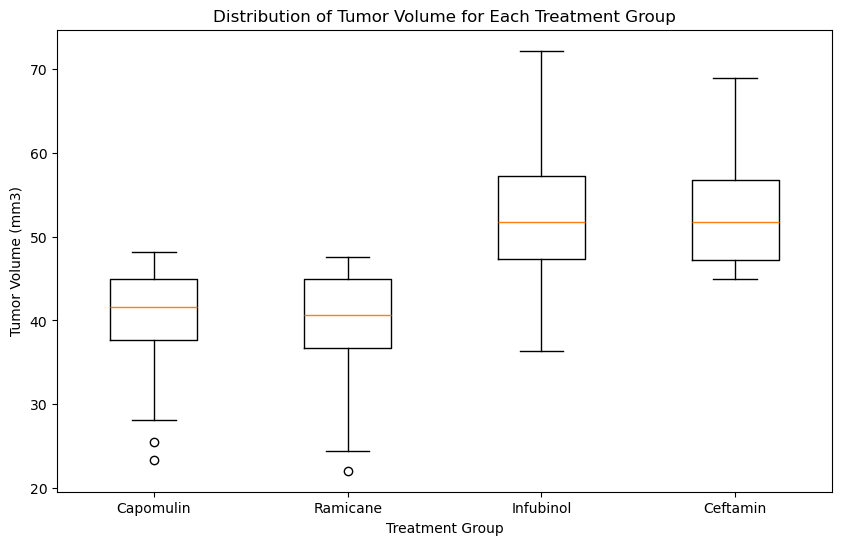

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
tumor_volume_data = [] #same list as before, empty so it stores tumor volume data for each treatment regime

# Iterate through each treatment regimen
for treatment in treatments_list:
    # Filter data for the current treatment regimen
    treatment_data = merged_data_df[merged_data_df['Drug Regimen'] == treatment]
    
    # Get tumor volume data for the current treatment regimen
    tumor_vol = treatment_data['Tumor Volume (mm3)']
    
    # Append tumor volume data to the list
    tumor_volume_data.append(tumor_vol)

# Create a box plot
plt.figure(figsize=(10, 6))
plt.boxplot(tumor_volume_data, labels=treatments_list) #specifies the treatment and the labels
plt.title('Distribution of Tumor Volume for Each Treatment Group')
plt.xlabel('Treatment Group')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

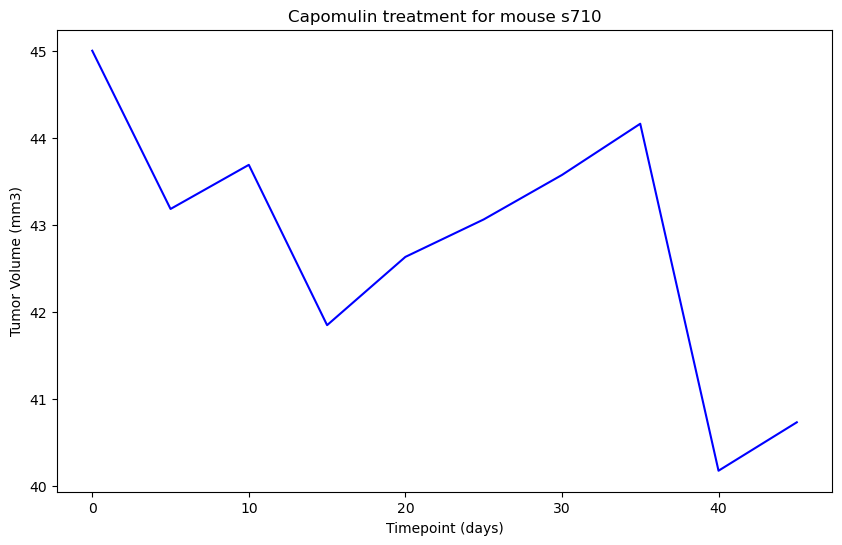

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
import random #random function will be used to look for a mouse ID treated with Capomulin instead of manually inputing it

capomulin_data = merged_data_df[merged_data_df['Drug Regimen']=='Capomulin'] # gets the data for the capomulin treatment
random_mouse_id = random.choice(capomulin_data['Mouse ID'].unique()) #chooses a random choice of Mouse ID from the filtered capomulin_data set
capomulin_mouse_data = capomulin_data[capomulin_data['Mouse ID'] == random_mouse_id] #this code filters the data for the mouse previously chosen in the random_mouse_id variable

#formatting fot the line plot:
plt.figure(figsize=(10, 6))
plt.plot(capomulin_mouse_data['Timepoint'], capomulin_mouse_data['Tumor Volume (mm3)'], color='b', linestyle='-')
plt.title(f'Capomulin treatment for mouse {random_mouse_id}')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

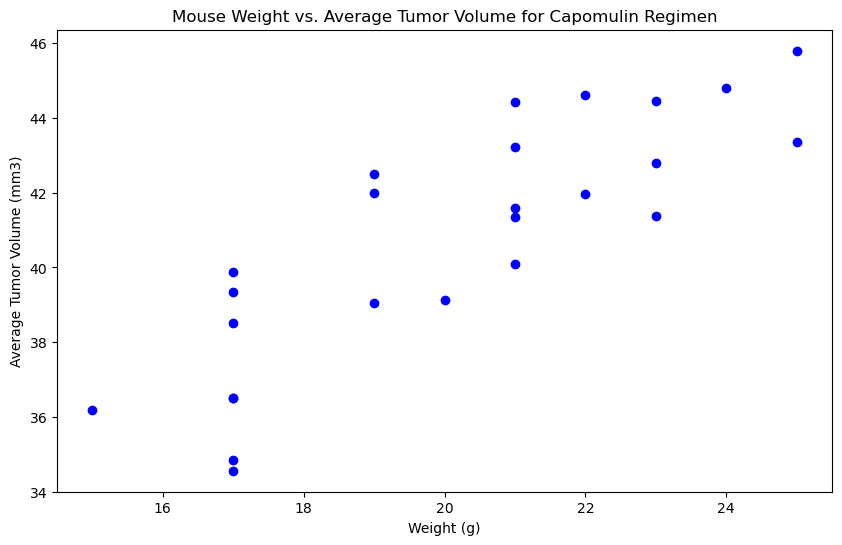

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Groups the data by Mouse ID and calculate the average observed tumor volume for each mouse treated with Capomulin:
capomulin_grouped = merged_data_df[merged_data_df['Drug Regimen'] == 'Capomulin'].groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Convert the grouped data to a DataFrame
capomulin_avg_tumor_volume = pd.DataFrame(capomulin_grouped)

# Merge the average tumor volume data with the mouse metadata to obtain the weight for each mouse
capomulin_weight_tumor = pd.merge(capomulin_avg_tumor_volume, mouse_metadata, on='Mouse ID', how='left')

# Plot mouse weight vs. the average observed tumor volume
plt.figure(figsize=(10, 6))
plt.scatter(capomulin_weight_tumor['Weight (g)'], capomulin_weight_tumor['Tumor Volume (mm3)'], color='blue')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

Correlation Coefficient: 0.841936342469472


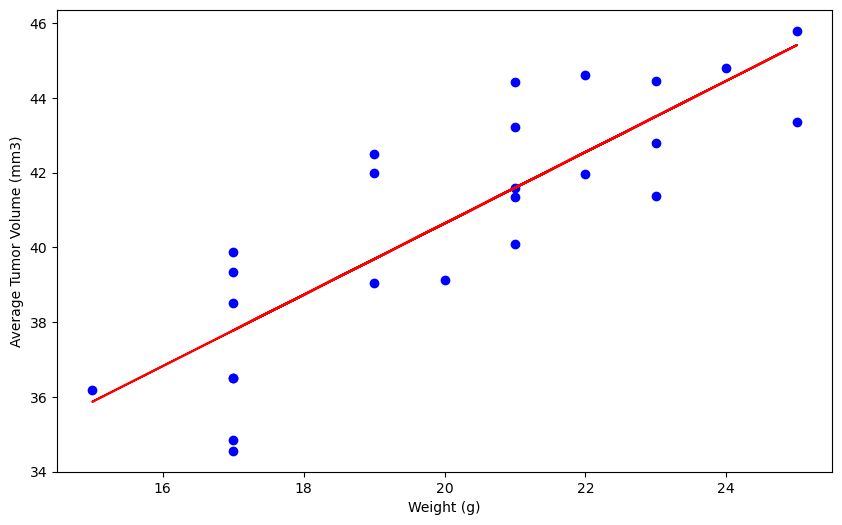

In [21]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation_coefficient, _ = st.pearsonr(capomulin_weight_tumor['Weight (g)'], capomulin_weight_tumor['Tumor Volume (mm3)']) #By using the comma to separate the items in the tuple, we can assign each value to a separate variable in a single line of code.
#the correlation coefficient, and the p-value which is stored in the underscore
print("Correlation Coefficient:", correlation_coefficient)

# Perform linear regression
slope, intercept, r_value, p_value, std_err = st.linregress(capomulin_weight_tumor['Weight (g)'], capomulin_weight_tumor['Tumor Volume (mm3)']) #calculates the linear regression values and assigns them to the variables specified prior to the equal sign

# Plot mouse weight vs. the average observed tumor volume
plt.figure(figsize=(10, 6))
plt.scatter(capomulin_weight_tumor['Weight (g)'], capomulin_weight_tumor['Tumor Volume (mm3)'], color='blue')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')


# Plot the linear regression line
x_values = capomulin_weight_tumor['Weight (g)']
regression_values = slope * x_values + intercept
plt.plot(x_values, regression_values, color='red')

plt.show()


In [ ]:
# .84 indicates a high, positive correlation between weight and average tumor volume.